In [3]:
from GasDynamicsSim import ShockSim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def get_shock(input_file, N):
    chunks = pd.read_csv(input_file, chunksize=N)
    data = pd.concat(chunks)
    return data

Iteration: 100. Current time: 0.002065. Final time: 0.025000. Time step: 2.011080e-05.
Iteration: 200. Current time: 0.004073. Final time: 0.025000. Time step: 2.004884e-05.
Iteration: 300. Current time: 0.006076. Final time: 0.025000. Time step: 2.001639e-05.
Iteration: 400. Current time: 0.008077. Final time: 0.025000. Time step: 2.000194e-05.
Iteration: 500. Current time: 0.010078. Final time: 0.025000. Time step: 2.001377e-05.
Iteration: 600. Current time: 0.012080. Final time: 0.025000. Time step: 2.003878e-05.
Iteration: 700. Current time: 0.014086. Final time: 0.025000. Time step: 2.008412e-05.
Iteration: 800. Current time: 0.016445. Final time: 0.025000. Time step: 2.489243e-05.
Iteration: 900. Current time: 0.018975. Final time: 0.025000. Time step: 2.584271e-05.
Iteration: 1000. Current time: 0.021557. Final time: 0.025000. Time step: 2.587623e-05.
Iteration: 1100. Current time: 0.024146. Final time: 0.025000. Time step: 2.624088e-05.
The process took  29.5602691


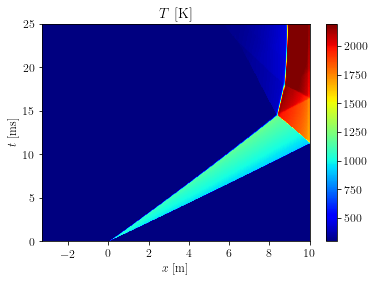

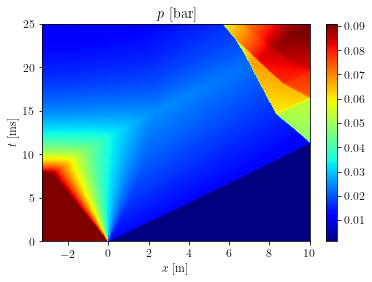

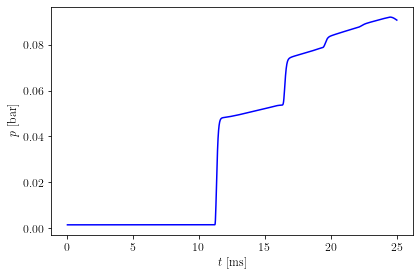

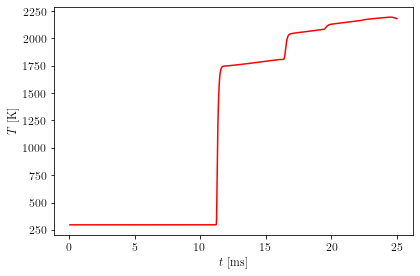

In [4]:
Mixture = {
    'mechanism':"O2Argon.xml",
    'X1':"O2:0.02, AR:0.98",
    'X4':"HE:0.5, N2:0.5"
}

Thermal = {
    'p4':1.8*6894.76,#0.1*101325,
    'p1':1*133.322,
    'T1':23+273,
}


Sim = {
    'nXFine':500, #grid definition
    'tFinal':25e-3, # simulation time
    'alpha':0.7, # boundary layer correction term for shear stress. 1 for incompressible case
    'beta':0.3, # boundary layer correction term for heat transfer. 1 for incompressible case
    'D_mul':1, # boundary layer correction term for effective diameter. 1 for incompressible case
    'BoundaryLayer': True,
    'Reacting': False,
    'Diffusion': False
}

Geometry = {
    'LDriver':3.3,# driver section length
    'LDriven':10,# driven section length
    'DDriver':15.24e-2, # driver section diameter
    'DDriven':15.24e-2 # driven section diameter
}

ssim = ShockSim(Mixture, Thermal, Sim, Geometry, saveData = False)
ssim.XT_Diagram()

In [10]:
np.savetxt('TMatrix.csv', ssim.TMatrix, delimiter=',')
np.savetxt('pMatrix.csv', ssim.pMatrix, delimiter=',')
np.savetxt('timeXT.csv', ssim.timeXT, delimiter=',')
np.savetxt('positionXT.csv', ssim.positionXT, delimiter=',')

Iteration: 100. Current time: 0.002185. Final time: 0.035000. Time step: 2.163590e-05.
Iteration: 200. Current time: 0.004351. Final time: 0.035000. Time step: 2.168902e-05.
Iteration: 300. Current time: 0.006522. Final time: 0.035000. Time step: 2.174224e-05.
Iteration: 400. Current time: 0.008699. Final time: 0.035000. Time step: 2.179565e-05.
Iteration: 500. Current time: 0.010882. Final time: 0.035000. Time step: 2.184889e-05.
Iteration: 600. Current time: 0.013069. Final time: 0.035000. Time step: 2.190225e-05.
Iteration: 700. Current time: 0.015262. Final time: 0.035000. Time step: 2.195560e-05.
Iteration: 800. Current time: 0.017460. Final time: 0.035000. Time step: 2.200904e-05.
Iteration: 900. Current time: 0.019664. Final time: 0.035000. Time step: 2.206252e-05.
Iteration: 1000. Current time: 0.021873. Final time: 0.035000. Time step: 2.211589e-05.
Iteration: 1100. Current time: 0.024087. Final time: 0.035000. Time step: 2.216931e-05.
Iteration: 1200. Current time: 0.026307. 

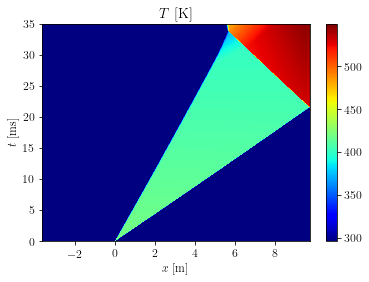

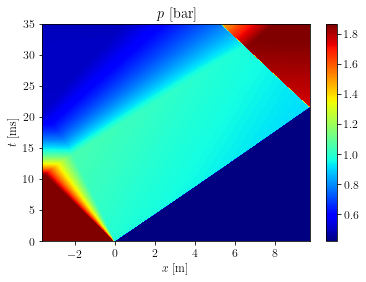

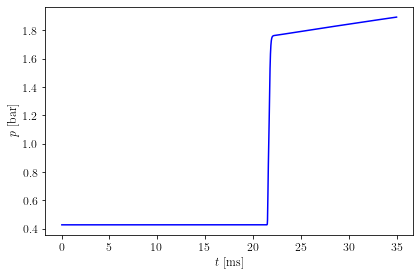

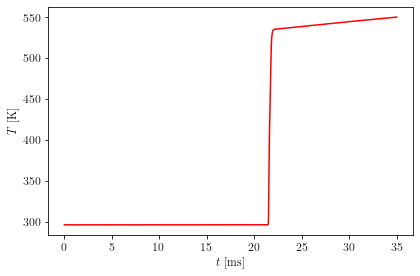

In [13]:
Mixture = {
    'mechanism':"O2Argon.xml",
    'X4':"N2:1",
    'X1':"AR:1"
}


Thermal = {
    'p4':30*6894.76,#27.5*6894.76,
    'p1':320.5*133.322,#88.2*133.322,
    'T1':23+273,
}

Sim = {
    'nXFine':1000,
    'tFinal':35e-3,
    'ProbeLoc': 2e-2,
    'alpha':1, # boundary layer correction term for shear stress. 1 for incompressible case
    'beta':1, # boundary layer correction term for heat transfer. 1 for incompressible case
    'D_mul':1, # boundary layer correction term for effective diameter. 1 for incompressible case
    'BoundaryLayer': True,
    'Reacting': False,
    'Diffusion': False
}

Geometry = {
    'LDriver':3.63,#9.57,
    'LDriven':9.73,
    'DDriver':11.53e-2,
    'DDriven':11.53e-2
}
ssim = ShockSim(Mixture, Thermal, Sim, Geometry, saveData = False)
ssim.XT_Diagram()

In [4]:
np.savetxt('TMatrix.csv', ssim.TMatrix, delimiter=',')
np.savetxt('pMatrix.csv', ssim.pMatrix, delimiter=',')
np.savetxt('timeXT.csv', ssim.timeXT, delimiter=',')
np.savetxt('positionXT.csv', ssim.positionXT, delimiter=',')

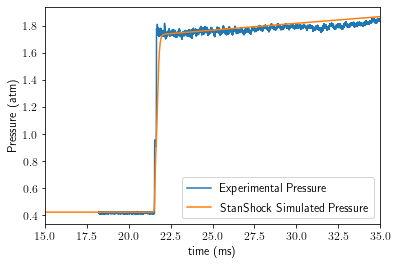

In [17]:
p = ssim.pNoInsert
T = ssim.TNoInsert
t = ssim.tNoInsert
s = ssim.sNoInsert
u = ssim.uNoInsert

Num_row = 5000
# shock measurement
exp = np.array(get_shock('exp031.csv', Num_row))
plt.figure()
#plt.plot(t/(1e-3), np.abs(u/s))
plt.plot(exp[:, 0]/(1e-3) + 18.2, exp[:, 1]/(101325), label = 'Experimental Pressure')
plt.plot(t/(1e-3), p/(101325), label = 'StanShock Simulated Pressure')
plt.xlabel('time (ms)')
plt.ylabel('Pressure (atm)')
plt.xlim((15, 35))
plt.legend()

In [ ]:
Mixture = {
    'mixtureFile':"O2Argon.xml",
    'X1':"O2:0.02, AR:0.98",
    'X4':"HE:1"
}

Thermal = {
    'p5':0.45*101325,
    'p1':299.9753,
    'T5':5280,
    'g4':5/3,
    'g1':0.98*(5/3)+0.02*(7/5),
    'W4':4,
    'W1':0.02*32+0.98*39.95
}

Sim = {
    'nXFine':250,
    'tFinal':13e-3,
    'BoundaryLayer': True,
    'Reacting': False,
    'Diffusion': False
}

Geometry = {
    'LDriver':3.3,#9.57,
    'LDriven':10,
    'DDriver':15.24e-2,
    'DDriven':15.24e-2
}
ssim = ShockSim(Mixture, Thermal, Sim, Geometry, saveData = False)

ssim.XT_DiagramT5p5p1()

In [3]:

p = ssim.pNoInsert
T = ssim.TNoInsert
t = ssim.tNoInsert
s = ssim.sNoInsert
u = ssim.uNoInsert

Text(0, 0.5, 'Pressure (atm)')

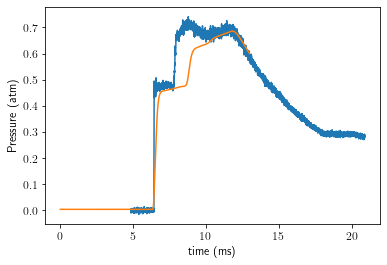

In [6]:
Num_row = 5000
# shock measurement
exp = np.array(get_shock('5280K_PressureTimeHistory.csv', Num_row))
plt.figure()
#plt.plot(t/(1e-3), np.abs(u/s))
plt.plot(exp[:, 0]/(1e-3) + 6.4847, exp[:, 1])
plt.plot(t/(1e-3), p/(101325))
plt.xlabel('time (ms)')
plt.ylabel('Pressure (atm)')
#plt.xlim((5, 10))

In [10]:
import numpy as np

In [ ]:
np.savetxt('T_bondChem.csv', T, delimiter=',')
np.savetxt('p_bondChem.csv', p, delimiter=',')
np.savetxt('time_bondChem.csv', t, delimiter=',')
#np.savetxt('Y_bondChem.csv', Y, delimiter=',')

In [11]:
np.savetxt('TMatrix.csv', ssim.TMatrix, delimiter=',')
np.savetxt('pMatrix.csv', ssim.pMatrix, delimiter=',')
np.savetxt('timeXT.csv', ssim.timeXT, delimiter=',')
np.savetxt('positionXT.csv', ssim.positionXT, delimiter=',')

In [6]:
np.tan(-3.2/180*np.pi)

-0.05590867980926056

In [1]:
from CoolingRateOpt import CoolingOpt
import numpy as np

C:\Users\Jackie Zheng\PycharmProjects\StanShock\stanShock.py:393: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "getCp_python" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(int64, dtype=Function(<class 'int'>))
 
There are 2 candidate implementations:
  - Of which 2 did not match due to:
  Overload of function 'zeros': File: numba\core\typing\npydecl.py: Line 507.
    With argument(s): '(int64, dtype=Function(<class 'int'>))':
   No match.

During: resolving callee type: Function(<built-in function zeros>)
During: typing of call at C:\Users\Jackie Zheng\PycharmProjects\StanShock\stanShock.py (416)


File "..\stanShock.py", line 416:
def getCp_python(T,Y,TTable,a,b):
    <source elided>
    #determine the indices
    indices = np.zeros(nX,dtype=int)
    ^

  def getCp_python(T,Y,TTable,a,b):
C:\Users\Jackie Zheng\PycharmProjects\StanShock\stanShock.py

Iteration: 100. Current time: 0.002019. Final time: 0.020000. Time step: 1.992169e-05.
Iteration: 200. Current time: 0.004005. Final time: 0.020000. Time step: 1.979146e-05.
Iteration: 300. Current time: 0.005980. Final time: 0.020000. Time step: 1.968536e-05.
Iteration: 400. Current time: 0.007945. Final time: 0.020000. Time step: 1.960461e-05.
Iteration: 500. Current time: 0.010082. Final time: 0.020000. Time step: 2.218369e-05.
Iteration: 600. Current time: 0.012577. Final time: 0.020000. Time step: 2.774669e-05.
Iteration: 700. Current time: 0.015400. Final time: 0.020000. Time step: 2.784370e-05.
Iteration: 800. Current time: 0.018060. Final time: 0.020000. Time step: 2.557076e-05.
The process took  13.73672019999998
Iteration: 100. Current time: 0.002022. Final time: 0.020000. Time step: 1.993402e-05.
Iteration: 200. Current time: 0.004009. Final time: 0.020000. Time step: 1.979787e-05.
Iteration: 300. Current time: 0.005984. Final time: 0.020000. Time step: 1.969358e-05.
Iterati

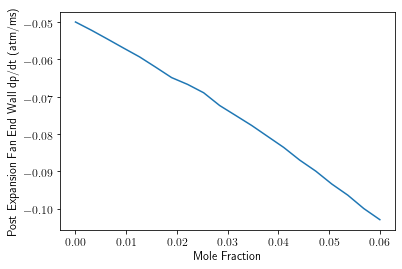

In [4]:
Mixture = {
    'mixtureFile':"O2Argon.xml",
    'X1':"O2:0.2, AR:0.8",
    'X4':"HE:1"
}

Thermal = {
    'p5':0.45*101325,
    'p1':299.9753,
    'T5':5280,
    'g4':5/3,
    'g1':0.98*(5/3)+0.02*(7/5),
    'W4':4,
    'W1':0.02*32+0.98*39.95
}

Sim = {
    'nXCoarse':300,
    'nXFine':1000,
    'xStep':10,
    'tFinal':20e-3,
    'theta':-2.7*0.8
}

Geometry = {
    'LDriver':3.3,#9.57,
    'LDriven':10,
    'DDriver':15.24e-2,
    'DDriven':15.24e-2
}
opt = CoolingOpt(Mixture, Thermal, Sim, Geometry, saveData = False)
Range = np.linspace(0, 0.06, 20)
dpdt = opt.CoolDriverGas(Range, 'AR')

In [5]:
np.savetxt('dpdtAR.csv', dpdt, delimiter=',')

In [1]:
import matplotlib.pyplot as plt

p = opt.pNoInsert
t = opt.tNoInsert

plt.plot(t/(1e-3), p/101325)

plt.plot(opt.xInsert, opt.DOuterInsert, 'k', label="$D_\mathrm{o}$")
plt.plot(opt.xInsert, opt.DInnerInsert, 'r', label="$D_\mathrm{i}$")
plt.plot(opt.xInsert_dis, opt.DInnerInsert_dis, 'b', label="$D_\mathrm{dis}$")
plt.xlim((-3, 0))

NameError: name 'opt' is not defined

In [4]:
'HE:'+ str(0.925) +',N2:' + str(0.075)

'HE:0.925,N2:0.075'